In [1]:
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, ids = load_data('spleen')
pipe = Pipeline(X, config=f"configs/config.ini", verbose=True, col_ids=ids)
plotter = Plotter(pipe)
pipe.run()

PCA: Knee found at 12 components. Using n=12.
KMedoids: Running parallel executions of clustering using n_jobs=-1.
KMedoids: Best score achieved for k=4 at 0.25.
TTest: Using 300 markers.
TTest: Running marker discovery in parallel.
TTest: Finished finding markers.
HyperGeom: Finished finding lvl1 types.
HyperGeom: Finished finding lvl2 types.


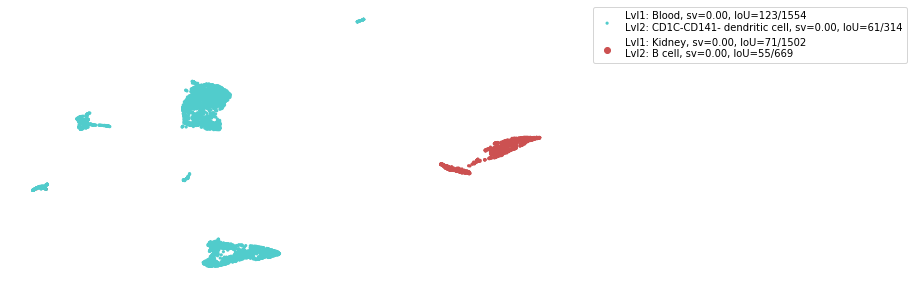

In [3]:
plotter.plot_clu()